In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df=pd.read_csv('train.csv')

In [22]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [24]:
df['Gender'].value_counts()

Male      4417
Female    3651
Name: Gender, dtype: int64

In [25]:
df.isnull().sum(axis=0)

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [26]:
df.dropna(axis=0,inplace=True)
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [27]:
for c in ('Gender','Ever_Married','Graduated','Profession','Profession','Var_1'):
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- Gender ---
Male      3677
Female    2988
Name: Gender, dtype: int64
---- Ever_Married ---
Yes    3944
No     2721
Name: Ever_Married, dtype: int64
---- Graduated ---
Yes    4249
No     2416
Name: Graduated, dtype: int64
---- Profession ---
Artist           2192
Healthcare       1077
Entertainment     809
Doctor            592
Engineer          582
Executive         505
Lawyer            500
Marketing         233
Homemaker         175
Name: Profession, dtype: int64
---- Profession ---
Artist           2192
Healthcare       1077
Entertainment     809
Doctor            592
Engineer          582
Executive         505
Lawyer            500
Marketing         233
Homemaker         175
Name: Profession, dtype: int64
---- Var_1 ---
Cat_6    4476
Cat_4     849
Cat_3     634
Cat_2     362
Cat_7     166
Cat_1     104
Cat_5      74
Name: Var_1, dtype: int64


In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Ever_Married'] = le.fit_transform(df['Ever_Married'])
df['Graduated'] = le.fit_transform(df['Graduated'])
df['Profession'] = le.fit_transform(df['Profession'])
df['Var_1'] = le.fit_transform(df['Var_1'])
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1.0,Low,4.0,3,D
2,466315,0,1,67,1,2,1.0,Low,1.0,5,B
3,461735,1,1,67,1,7,0.0,High,2.0,5,B
5,461319,1,1,56,0,0,0.0,Average,2.0,5,C
6,460156,1,0,32,1,5,1.0,Low,3.0,5,C


In [29]:
df['Spending_Score'] = le.fit_transform(df['Spending_Score'])
df['Segmentation'] = le.fit_transform(df['Segmentation'])
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1.0,2,4.0,3,3
2,466315,0,1,67,1,2,1.0,2,1.0,5,1
3,461735,1,1,67,1,7,0.0,1,2.0,5,1
5,461319,1,1,56,0,0,0.0,0,2.0,5,2
6,460156,1,0,32,1,5,1.0,2,3.0,5,2


In [30]:
df=df.drop(['ID'],axis=1)
df.head()


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1.0,2,4.0,3,3
2,0,1,67,1,2,1.0,2,1.0,5,1
3,1,1,67,1,7,0.0,1,2.0,5,1
5,1,1,56,0,0,0.0,0,2.0,5,2
6,1,0,32,1,5,1.0,2,3.0,5,2


<AxesSubplot:>

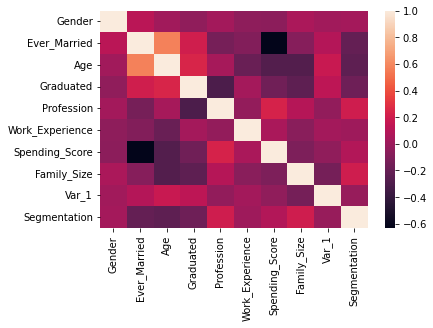

In [31]:
sns.heatmap(df.corr())

In [32]:
x = df.drop(['Segmentation'], axis = 1)
y = df['Segmentation']

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2) 

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
reg = LogisticRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5116279069767442


C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


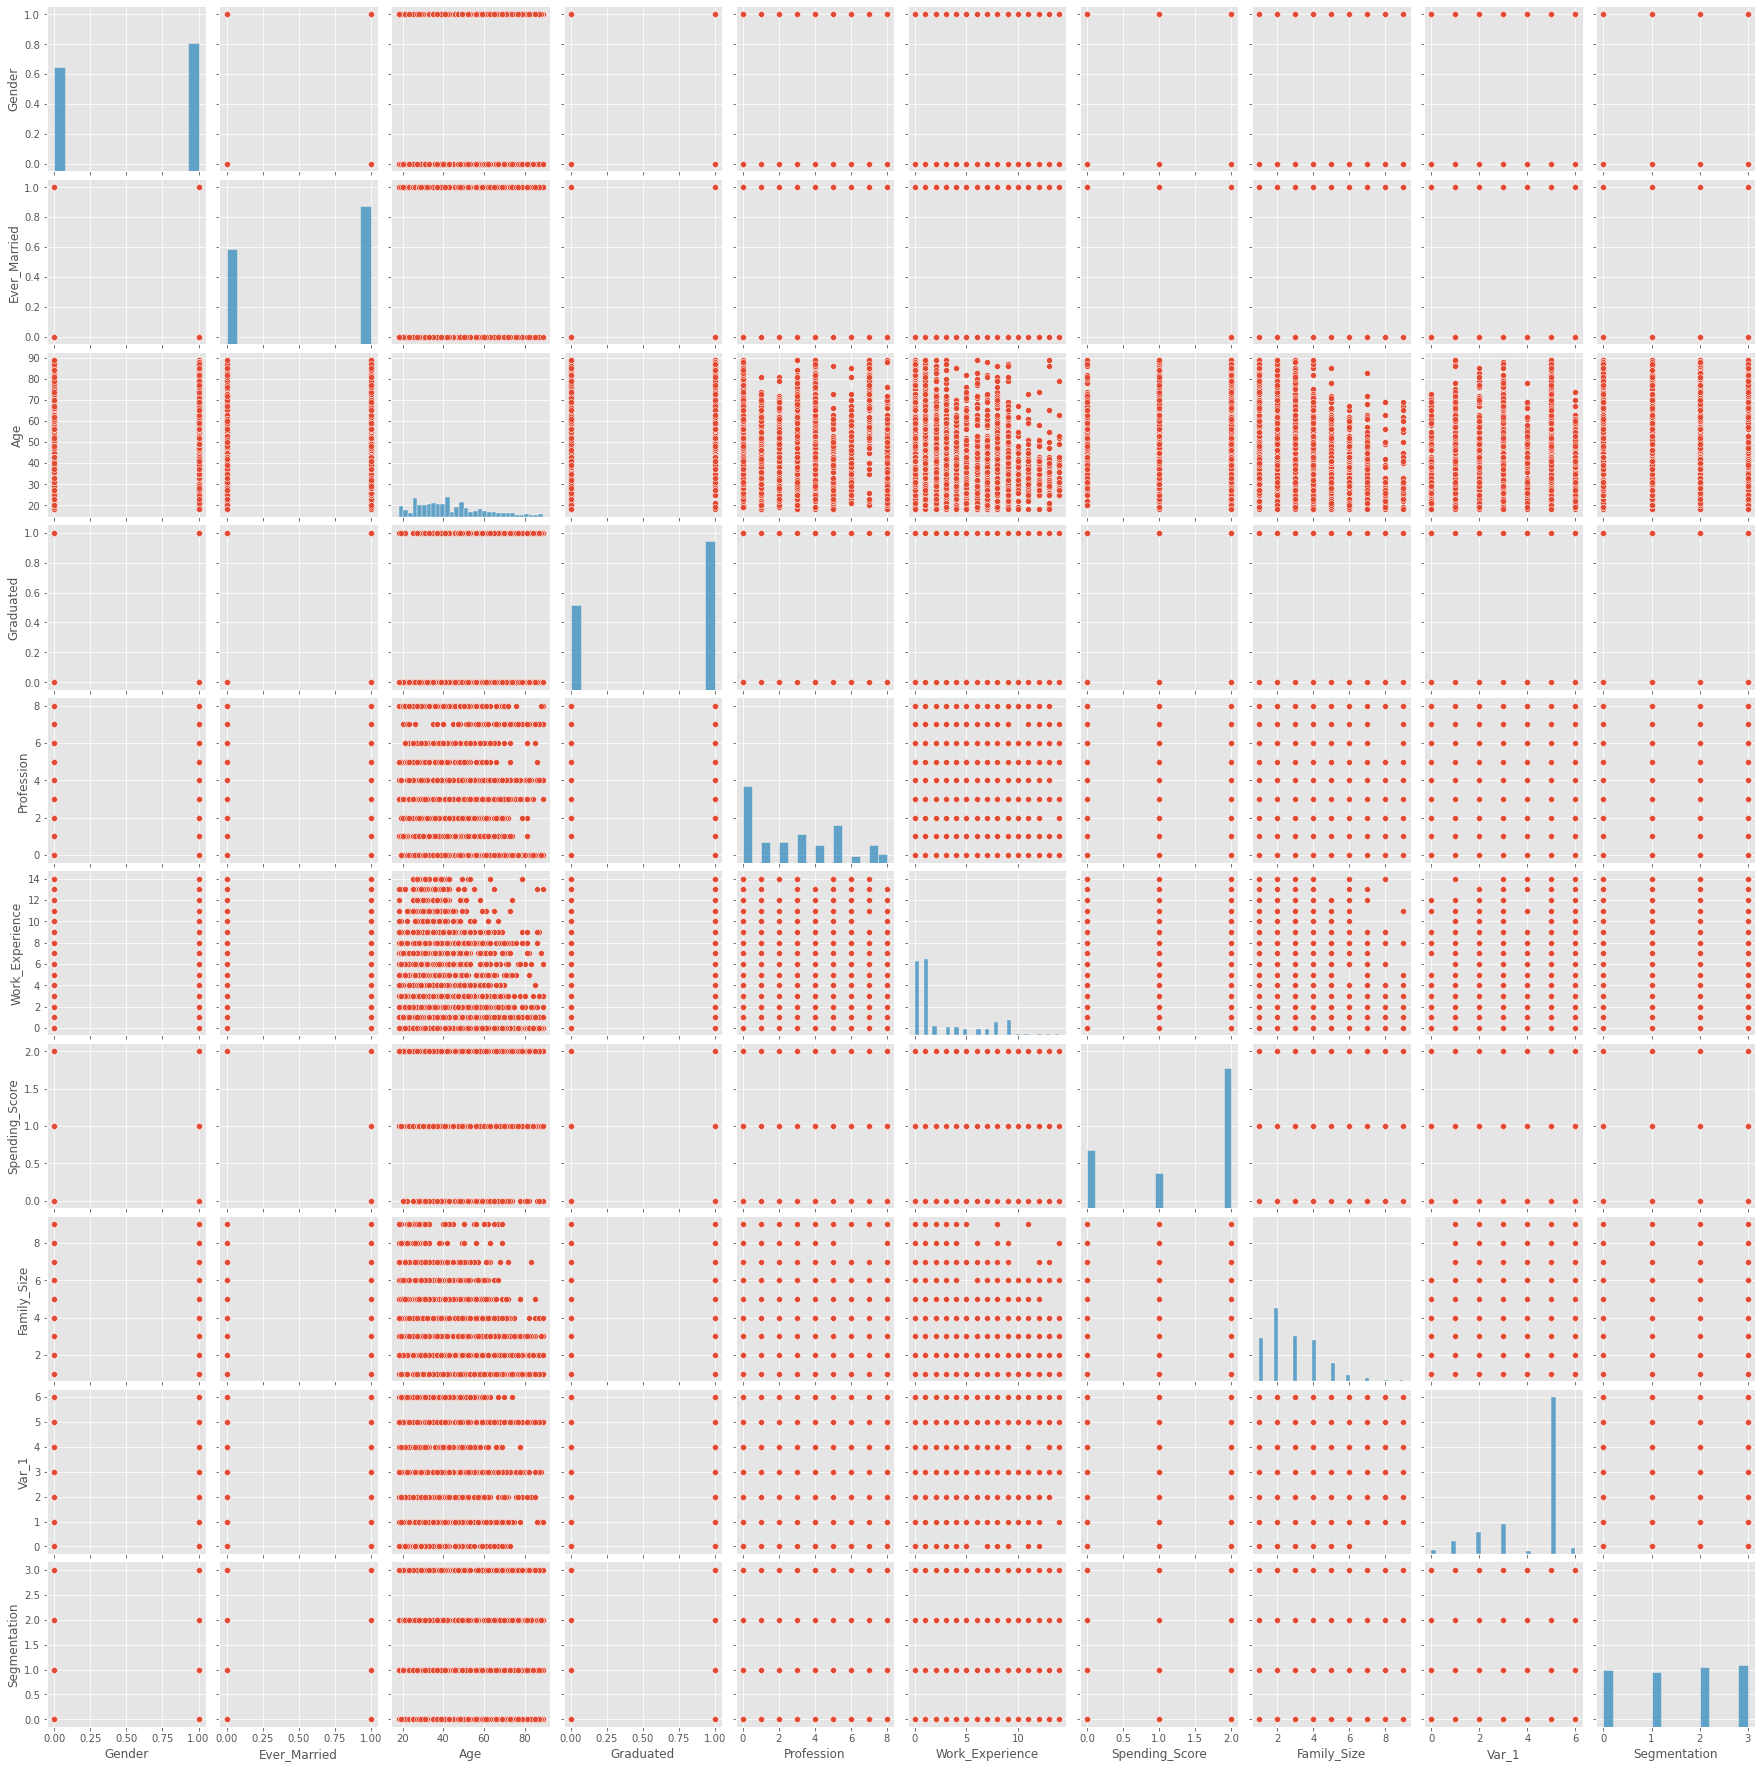

In [35]:
plt.style.use('ggplot')
sns.pairplot(df)

In [36]:
df1=pd.read_csv('test.csv')

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Ever_Married'] = le.fit_transform(df['Ever_Married'])
df['Graduated'] = le.fit_transform(df['Graduated'])
df['Profession'] = le.fit_transform(df['Profession'])
df['Var_1'] = le.fit_transform(df['Var_1'])
df['Spending_Score'] = le.fit_transform(df['Spending_Score'])
df['Segmentation'] = le.fit_transform(df['Segmentation'])
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1.0,2,4.0,3,3
2,0,1,67,1,2,1.0,2,1.0,5,1
3,1,1,67,1,7,0.0,1,2.0,5,1
5,1,1,56,0,0,0.0,0,2.0,5,2
6,1,0,32,1,5,1.0,2,3.0,5,2


In [39]:
x1 = df.drop(['Segmentation'], axis = 1)
y1 = df['Segmentation']

In [41]:
y_pred1 = reg.predict(x1)
print("Accuracy:",metrics.accuracy_score(y1, y_pred1))

Accuracy: 0.4957239309827457


In [42]:
correlation_matrix = df.corr()
correlation_matrix["Segmentation"]

Gender             0.033590
Ever_Married      -0.206909
Age               -0.231696
Graduated         -0.172233
Profession         0.201226
Work_Experience    0.006982
Spending_Score     0.084895
Family_Size        0.199412
Var_1             -0.019768
Segmentation       1.000000
Name: Segmentation, dtype: float64

In [43]:
#KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [53]:
knn.score(x_test, y_test)

0.4463615903975994

In [54]:
knn.score(x1, y1)

0.6357089272318079

In [55]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x1)
cm = confusion_matrix(y1, y_pred)
cm

array([[1179,  169,  118,  150],
       [ 446,  814,  238,   74],
       [ 321,  248, 1061,   90],
       [ 366,  140,   68, 1183]], dtype=int64)

Text(42.0, 0.5, 'Truth')

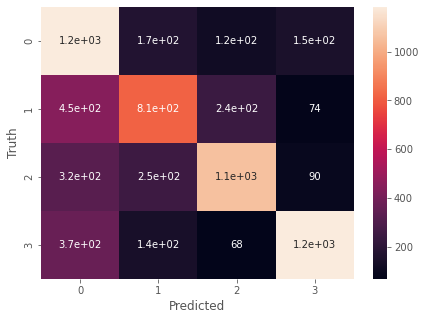

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y1, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.73      0.60      1616
           1       0.59      0.52      0.55      1572
           2       0.71      0.62      0.66      1720
           3       0.79      0.67      0.73      1757

    accuracy                           0.64      6665
   macro avg       0.65      0.63      0.64      6665
weighted avg       0.66      0.64      0.64      6665



In [58]:
#SVM

In [59]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)

SVC()

In [60]:
model.score(x1, y1)

0.4822205551387847